## Load data

In [7]:
import numpy as np
import _pickle as pkl
import torch
import torch.nn as nn
from torchvision import transforms
%matplotlib inline 
import matplotlib.pyplot as plt
import os, sys, time
sys.path.append('../..')
from utils import set_seed_torch, rgb2gray
set_seed_torch(3)
from argparse import Namespace
import json
from utils import load_models, load_vh_models, frame_stack

In [23]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d
        
args = ObjectView({'res': 64,
 'dataset_path': '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/{}'
                   .format("visual_haptic_2D_len16_osc_withGT_8C12919B740845539C0E75B5CBAF7965.pkl"),
 'models_dir': '/home/olimoyo/visual-haptic-dynamics/saved_models/{}'
                   .format("vaughan/osc/"),
 'device': 'cuda:1',
 'n_examples': 3,
 'n_pred': 8,
 'n_initial': 5
})

def load_models_dir(models_dir):
    """Load hyperparameters from trained model."""
    dict_of_models = {}
    for filedir in os.listdir(models_dir):
        fullpath = os.path.join(models_dir, filedir)
        if os.path.isdir(fullpath):
            with open(os.path.join(fullpath, 'hyperparameters.txt'), 'r') as fp:
                dict_of_models[fullpath] = Namespace(**json.load(fp))
    return dict_of_models

In [24]:
with open(args.dataset_path, 'rb') as f:
    raw_data = pkl.load(f)

data = {}
data['img_rgb'] = torch.from_numpy(raw_data["img"].transpose(0, 1, 4, 2, 3)).int().to(device=args.device)
data['img_gray'] = torch.from_numpy(rgb2gray(raw_data["img"]).transpose(0, 1, 4, 2, 3)).float().to(device=args.device)
data['haptic'] = torch.from_numpy(raw_data['ft']).float().to(device=args.device) / 100.0
data['arm'] = torch.from_numpy(raw_data['arm']).float().to(device=args.device)

data['actions'] = torch.from_numpy(raw_data["action"]).to(device=args.device).float()

## Visualize

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/nstep2_z16_net512_l0_lm_osc_v_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [2.745629  4.0979404 2.4573188 2.6713085 3.7972302 4.137975  4.695414
 5.656723 ]


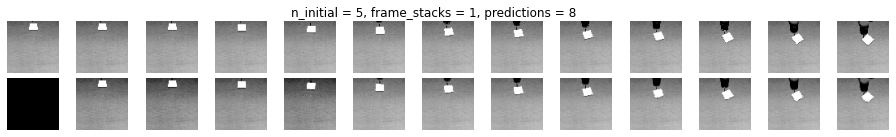

MSE of predictions:  [2.6871629 1.6528915 1.882452  1.6910075 2.77055   1.4455227 1.5335736
 2.3251672]


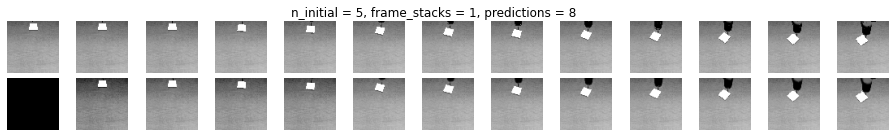

MSE of predictions:  [ 4.597669   5.7753325  5.337463   5.8498225  7.5641828  8.740707
  9.813934  11.904758 ]


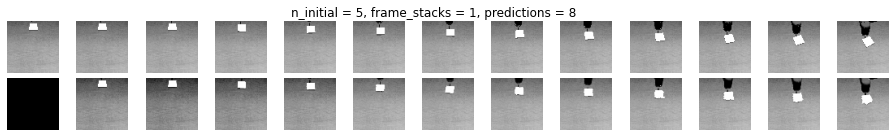

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/none_z16_net512_l0_lm_osc_v_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [1.5190153 1.663413  2.3282208 3.7286005 2.4384742 3.5039263 2.8200402
 2.0122123]


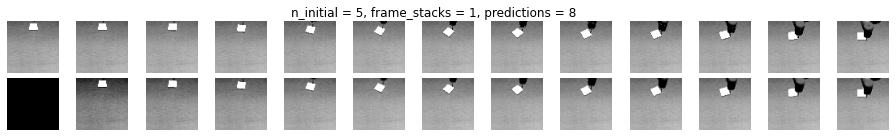

MSE of predictions:  [1.6519718 1.9812315 2.0679717 2.06124   3.0654929 2.4486237 4.0700855
 4.0940094]


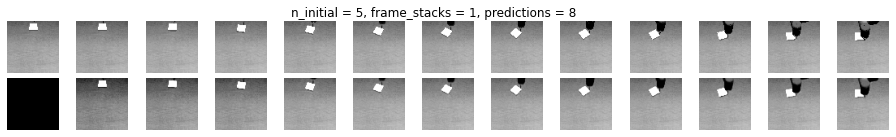

MSE of predictions:  [1.2084346 1.8963577 3.217654  4.1204114 2.7474873 2.8524547 3.907383
 2.7797992]


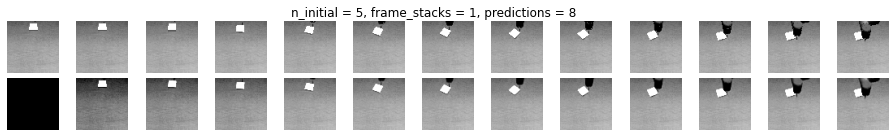

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/goallatent_z16_net512_l0_lm_osc_vha_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [0.68967116 3.5044334  3.027967   3.401971   2.2139099  3.3468373
 5.596546   6.1039124 ]


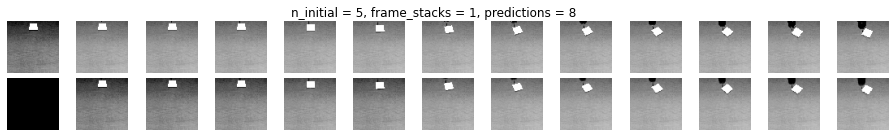

MSE of predictions:  [ 3.7273102  5.5001354  7.931096   5.0028405  7.81685    6.0208273
  9.4096575 10.114413 ]


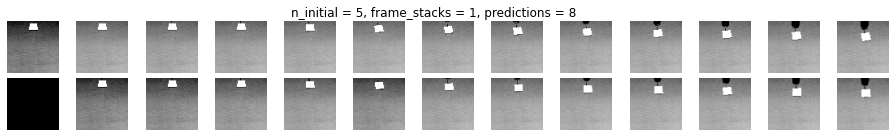

MSE of predictions:  [2.758526  3.312615  5.7087936 6.970803  6.0959063 6.0986514 5.4413385
 7.915236 ]


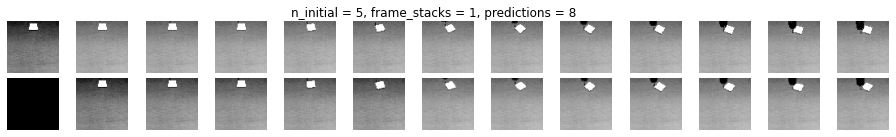

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/goallatent_z16_net512_l0_lm_osc_v_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [ 5.974137 11.308847 12.217133 12.350268 13.595455 22.344238 18.872671
 25.2931  ]


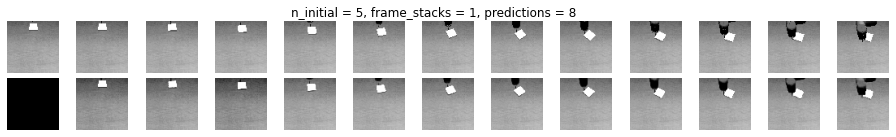

MSE of predictions:  [ 8.535926 11.235511 13.304041 16.407278 21.61806  26.28861  30.03647
 28.568926]


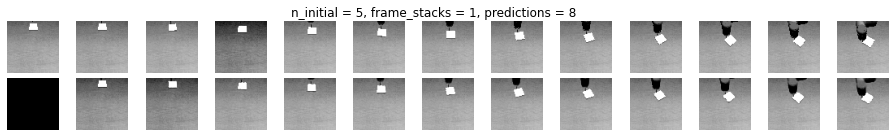

MSE of predictions:  [ 3.8981876  7.1411505  7.6214056 12.841054  13.301277  20.311749
 21.610151  28.581408 ]


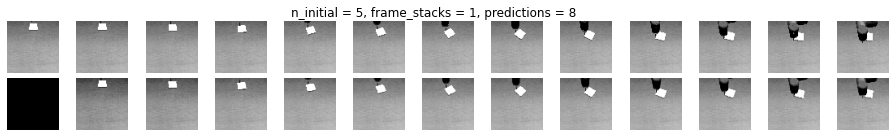

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/nstep2_z16_net512_l0_lm_osc_vha_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [1.8933593 2.0985305 4.2485843 2.6891346 4.301235  3.7113652 5.3906307
 8.221814 ]


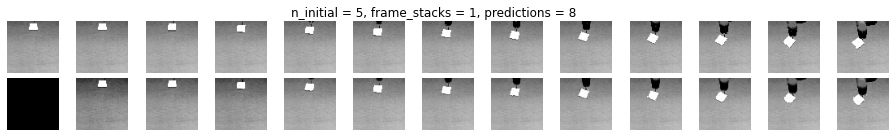

MSE of predictions:  [2.1474612 3.8819635 3.156539  2.6652372 2.438031  5.265957  5.212434
 9.185977 ]


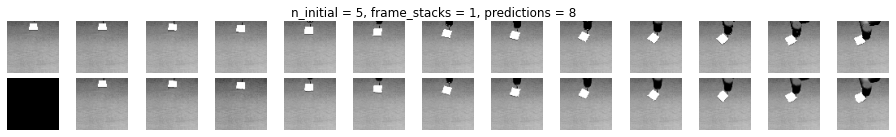

MSE of predictions:  [2.0602553 2.561839  5.2851224 3.1886663 3.788797  7.207088  6.130495
 5.701354 ]


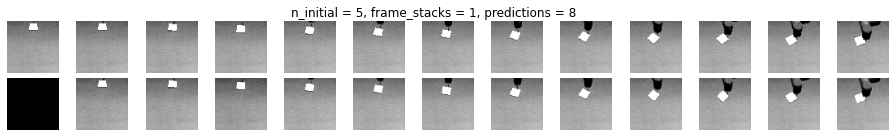

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/z16_net512_l0_lm_ul_osc_v_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [0.4609058 1.8989172 2.112488  2.8330953 2.2608318 3.286956  4.3491983
 2.6727033]


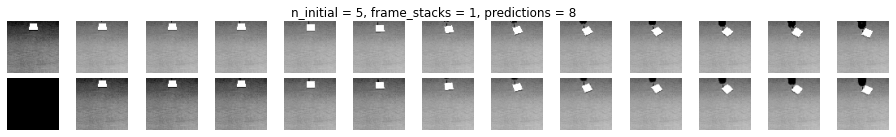

MSE of predictions:  [1.2080677  0.59546745 1.8181392  1.79109    2.5481293  2.0526102
 2.0262432  3.2500765 ]


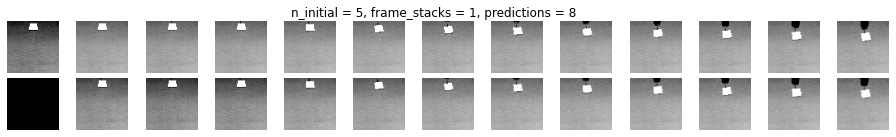

MSE of predictions:  [0.8394063 1.4005733 1.7240293 1.0260075 1.2534055 1.3069924 1.5352855
 1.7738225]


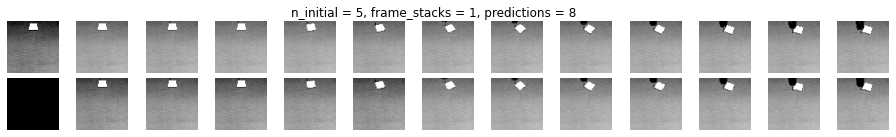

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/z16_net512_l0_lm_osc_vha_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [2.0020294 2.9050844 2.0506985 4.1106296 4.428885  5.1713543 3.4916348
 4.442684 ]


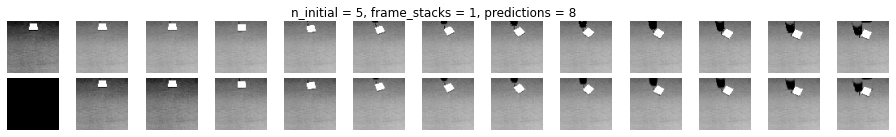

MSE of predictions:  [2.2866745 3.1864922 3.5693326 3.8240912 2.720619  3.5143793 3.2278595
 6.1796055]


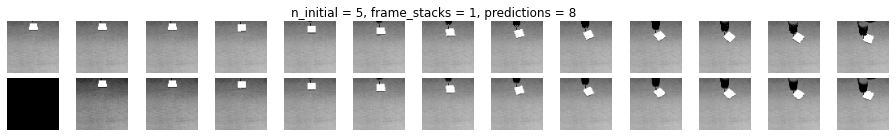

MSE of predictions:  [1.7547596 1.7762258 2.8214507 2.524464  3.0011914 3.2773662 2.9191546
 4.0054445]


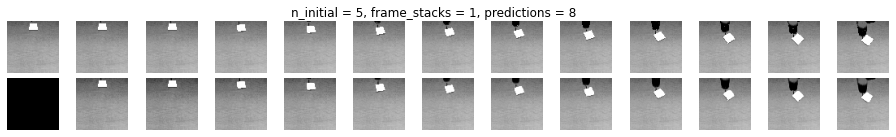

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/none_z16_net512_l0_lm_osc_vha_r0.95_kl0.80_lr3e4
torch.Size([12, 16])
MSE of predictions:  [0.7733083 1.2146215 1.4897357 2.379227  1.6450819 2.3392832 1.5664954
 2.6296465]


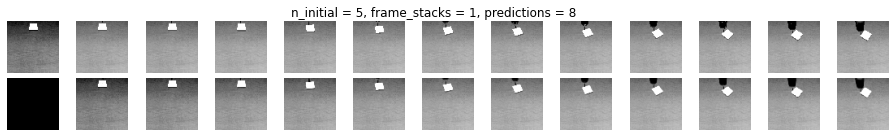

MSE of predictions:  [1.2710757 1.551957  1.5253195 1.9546212 1.3797098 1.5621443 2.6217575
 2.9432132]


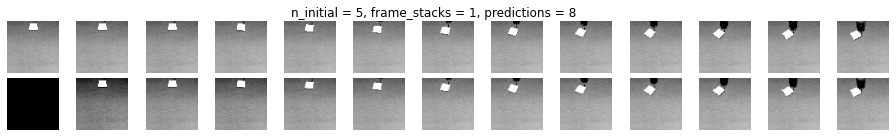

MSE of predictions:  [0.5010579  0.84222764 2.1096704  1.3565578  0.69497246 1.5712984
 2.198074   2.1476684 ]


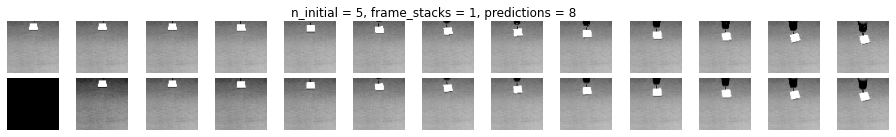

In [41]:
dict_of_models = load_models_dir(args.models_dir)

with torch.no_grad():
    for path, model_args in dict_of_models.items():
            
        nets = load_vh_models(path=path, args=model_args, mode='eval', device=args.device)
        
        def encode(nets, x_img, x_ft, x_arm, ctx_img):
            if model_args.context_modality != "none":
                if model_args.context_modality == "joint": 
                    ctx = torch.cat((x_ft, x_arm), dim=-1) # (n, l, f, 12)
                elif model_args.context_modality == "ft": 
                    ctx = x_ft
                elif model_args.context_modality == "arm":
                    ctx = x_arm
                ctx = ctx.float().to(device=args.device) # (n, l, f, 6)
                ctx = ctx.transpose(-1, -2)
                ctx = ctx.reshape(-1, *ctx.shape[2:])
            n, l = x_img.shape[0], x_img.shape[1]

            if model_args.context in ["initial_image", "goal_image"]:
                x_img = torch.cat((x_img, ctx_img.repeat(1, l, 1, 1, 1)), dim=2)

            z_all_enc = []
            z_img = nets["img_enc"](x_img.reshape(-1, *x_img.shape[2:]))
            z_all_enc.append(z_img)    

            if model_args.context_modality != "none":
                z_context = nets["context_enc"](ctx)
                z_all_enc.append(z_context)
            
            if model_args.context in ["initial_latent_state", "goal_latent_state"]:
                z_img_context = nets["context_img_enc"](ctx_img)
                z_img_context_rep = z_img_context.unsqueeze(1).repeat(1, l, 1)
                z_all_enc.append(z_img_context_rep.reshape(-1, *z_img_context_rep.shape[2:]))        
            elif model_args.context in ["all_past_states"]:
                z_img_context, h_img_context = nets["context_img_rnn_enc"](
                    z_img.reshape(n, l, *z_img.shape[1:]).transpose(1,0)
                )
                z_img_context = z_img_context.transpose(1, 0)
                z_all_enc.append(z_img_context.reshape(-1, *z_img_context.shape[2:]))
            else:
                z_img_context = None
                
            z_cat_enc = torch.cat(z_all_enc, dim=-1)
            z, mu_z, logvar_z = nets["mix"](z_cat_enc)
            var_z = torch.diag_embed(torch.exp(logvar_z))
            
            return z, mu_z, var_z, z_img_context
        
        if model_args.dim_x[0] == 1:
            img_key = 'img_gray'
        elif model_args.dim_x[0] == 3:
            img_key = 'img_rgb'
                    
        T = model_args.frame_stacks
        
        assert args.n_initial + args.n_pred <= data[img_key].shape[1]
        assert args.n_initial >= T
        
        # Use a random batch to test
        ii = np.random.randint(data[img_key].shape[0] // args.n_examples)
        batch_range = range(args.n_examples*ii, args.n_examples*(ii+1))
        test_batch = {k:v[batch_range] for k,v in data.items()}
        
        # Ground truth images and controls
        x_img = test_batch[img_key][:, :(args.n_initial + args.n_pred)]
        u = test_batch['actions']
        
        # Sequence of initial images
        x_img_i = x_img[:, :args.n_initial]
        x_img_i = frame_stack(x_img_i, frames=T)
        
        # Sequence of ground truth images
        x_img_gt = x_img[:, -(T + 1):]
        x_img_gt = frame_stack(x_img_gt, frames=T)
        
        # Sequence of extra modalities
        x_ft_i = test_batch['haptic'][:, T:args.n_initial]
        x_arm_i = test_batch['arm'][:, T:args.n_initial]

        n, l = x_img_i.shape[0], x_img_i.shape[1] 

        if model_args.context in ["initial_latent_state", "initial_image"]:
            ctx_img = x_img_i[:, 0]
        elif model_args.context in ["goal_latent_state", "goal_image"]:
            ctx_img = x_img_gt[:, 0]
        else:
            ctx_img = None
        
        # Encode
        z_i, mu_z_i, var_z_i, z_img_context = encode(nets, x_img_i, x_ft_i, x_arm_i, ctx_img)
        h_i = None
        
        # Group and prepare for prediction
        q_z_i = {"z": z_i, "mu": mu_z_i, "cov": var_z_i}
        q_z_i = {k:v.reshape(n, l, *v.shape[1:]).transpose(1,0) for k, v in q_z_i.items()}
        u = u.transpose(1,0)

        z_hat = torch.zeros(((l + args.n_pred), n, model_args.dim_z)).to(device=args.device)
        z_hat[0:l] = q_z_i["mu"]
        
        # First run
        z_i, mu_z_i, var_z_i = q_z_i["z"], q_z_i["mu"], q_z_i["cov"]
        u_i = u[(T + 1):(1 + args.n_initial)]

        # Predict
        for jj in range(0, args.n_pred):
            z_ip1, mu_z_ip1, var_z_ip1, h_ip1 = nets["dyn"](
                z_t=z_i, 
                mu_t=mu_z_i, 
                var_t=var_z_i, 
                u=u_i, 
                h_0=h_i, 
                single=False
            )
            z_hat[jj + l] = mu_z_ip1[-1]
            z_i, mu_z_i, var_z_i, h_i = z_ip1[-1:], mu_z_ip1[-1:], var_z_ip1[-1:], h_ip1
            u_i = u[1 + args.n_initial + jj][None]
        
#             if model_args.context in ["all_past_states"]:
#                 z_img_context_ip1 = z_img_context[:, -1]
#                 z_cat_single_dec = torch.cat((mu_z_ip1, z_img_context_ip1), dim=-1)
#                 x_hat_ip1 = nets["img_dec"](z_cat_single_dec)
#                 z_img_ip1 = nets["img_enc"](x_hat_ip1)
#                 z_img_context_ip1, h_img_context = nets["context_img_rnn_enc"](z_img_ip1.unsqueeze(0), h=h_img_context)
#                 z_img_context = torch.cat((z_img_context, z_img_context_ip1.transpose(1,0)), dim=1)
                
        z_hat = z_hat.transpose(1, 0)

        # Decode
        z_all_dec = []
        z_all_dec.append(z_hat)

        if model_args.context in ["initial_latent_state", "goal_latent_state"]:
            z_img_context_rep = z_img_context.unsqueeze(1).repeat(1, (l + args.n_pred), 1)
            z_all_dec.append(z_img_context_rep)
#         elif model_args.context in ["all_past_states"]:
#             z_all_dec.append(z_img_context)

        z_cat_dec = torch.cat(z_all_dec, dim=-1)
        x_hat = nets["img_dec"](z_cat_dec.reshape(-1, *z_cat_dec.shape[2:]))
        x_hat = x_hat.reshape(n, (l + args.n_pred), *x_hat.shape[1:])
                
        # Move to cpu, np
        x_hat = x_hat.cpu().numpy()
        x_img = x_img.cpu().numpy()

        mse = np.sum((x_hat[:, l:, 0].reshape(n, args.n_pred, -1) - 
                      x_img[:, args.n_initial:, 0].reshape(n, args.n_pred, -1))**2, axis=2)

        # Plotting
        for bb in range(n):
            columns = args.n_initial + args.n_pred
            rows = 2
            fig=plt.figure(figsize=(16, 2))
            fig.suptitle('n_initial = {}, frame_stacks = {}, predictions = {}'.format(args.n_initial, T, args.n_pred))
            for ii in range(columns*rows):
                if ii<((columns*rows)/2):
                    img = x_img[bb,ii,0,:,:]
                else:
                    idx = int(ii-((columns*rows)/2))
                    if idx < T:
                        img = np.zeros((model_args.dim_x[1], model_args.dim_x[2]))
                    else:
                        img = x_hat[bb,idx-1,0,:,:]
                fig.add_subplot(rows, columns, ii+1)
                plt.imshow(img, cmap="gray")
                
                plt.axis('off')
            print("MSE of predictions: ", mse[bb])
            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.show()